In [1]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot

%matplotlib inline

import pickle

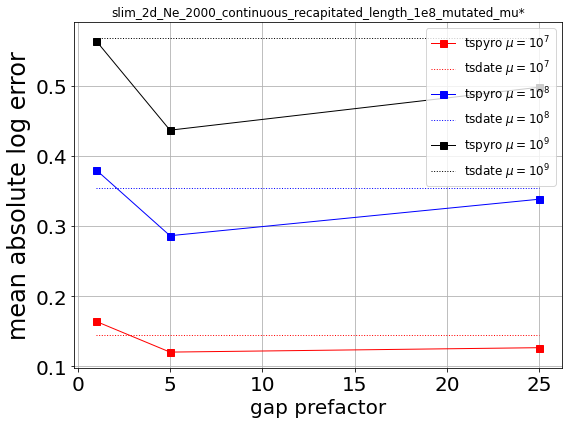

In [15]:
base = {7: [0.14448466253145642, 0.14448466253145642, 0.14448466253145642], 8: [0.35400597984301335, 0.35400597984301335, 0.35400597984301335], 9: [0.5675628111337863, 0.5675628111337863, 0.5675628111337863]}
pyro = {7: [0.1641976033129386, 0.12046550126616348, 0.12675578423362643], 8: [0.3799294642214073, 0.2861899664569888, 0.3381958962539138], 9: [0.5636878595265139, 0.436454127925711, 0.49768241539715835]}

f, ax = pyplot.subplots(1, 1, figsize=(8, 6))
mus = [7, 8, 9]
gaps = [1.0, 5.0, 25.0]
colors = ['r', 'b', 'k']

ax.set_xlabel("gap prefactor", fontsize=20)
ax.set_ylabel("mean absolute log error", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu*")
for mu, color in zip(mus, colors):
    ax.plot(gaps, pyro[mu], color=color, lw=1, marker='s', markersize=7, 
            label='tspyro $\\mu=10^{}$'.format(mu))
    ax.plot(gaps, np.ones(3) * base[mu][0], color=color, lw=1, ls='dotted', 
            label='tsdate $\\mu=10^{}$'.format(mu))

ax.grid()
pyplot.legend(fontsize=12, loc='upper right')
pyplot.tight_layout()
pyplot.savefig('gap_prefactors_male.pdf')

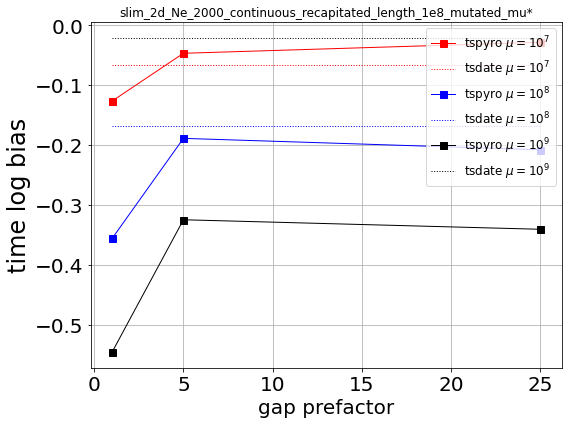

In [16]:
base = {7: [-0.06578562982460032, -0.06578562982460032, -0.06578562982460032], 8: [-0.16794678821461395, -0.16794678821461395, -0.16794678821461395], 9: [-0.021510613372858815, -0.021510613372858815, -0.021510613372858815]}
pyro = {7: [-0.12654477675801618, -0.046822153232262305, -0.0284640752688931], 8: [-0.35569712678552134, -0.18873901194254833, -0.20772193634163577], 9: [-0.5451670679125146, -0.32446786629298763, -0.3403422241970942]}

f, ax = pyplot.subplots(1, 1, figsize=(8, 6))
mus = [7, 8, 9]
gaps = [1.0, 5.0, 25.0]
colors = ['r', 'b', 'k']

ax.set_xlabel("gap prefactor", fontsize=20)
ax.set_ylabel("time log bias", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu*")
for mu, color in zip(mus, colors):
    ax.plot(gaps, pyro[mu], color=color, lw=1, marker='s', markersize=7, 
            label='tspyro $\\mu=10^{}$'.format(mu))
    ax.plot(gaps, np.ones(3) * base[mu][0], color=color, lw=1, ls='dotted', 
            label='tsdate $\\mu=10^{}$'.format(mu))

ax.grid()
pyplot.legend(fontsize=12, loc='upper right')
pyplot.tight_layout()
pyplot.savefig('gap_prefactors_log_bias.pdf')

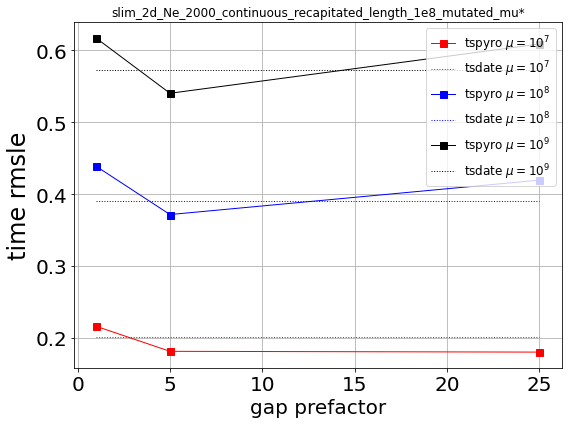

In [17]:
base = {7: [0.20195037604638277, 0.20195037604638277, 0.20195037604638277], 8: [0.3901617144560996, 0.3901617144560996, 0.3901617144560996], 9: [0.5727348962240779, 0.5727348962240779, 0.5727348962240779]}
pyro = {7: [0.2164229499255183, 0.18159063410089363, 0.18051999368444951], 8: [0.4388933546993232, 0.37174693450873836, 0.4195878675260962], 9: [0.6170596459901758, 0.5403569705353689, 0.6088628381664651]}

f, ax = pyplot.subplots(1, 1, figsize=(8, 6))
mus = [7, 8, 9]
gaps = [1.0, 5.0, 25.0]
colors = ['r', 'b', 'k']

ax.set_xlabel("gap prefactor", fontsize=20)
ax.set_ylabel("time rmsle", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu*")
for mu, color in zip(mus, colors):
    ax.plot(gaps, pyro[mu], color=color, lw=1, marker='s', markersize=7, 
            label='tspyro $\\mu=10^{}$'.format(mu))
    ax.plot(gaps, np.ones(3) * base[mu][0], color=color, lw=1, ls='dotted', 
            label='tsdate $\\mu=10^{}$'.format(mu))

ax.grid()
pyplot.legend(fontsize=12, loc='upper right')
pyplot.tight_layout()
pyplot.savefig('gap_prefactors_rmsle.pdf')

In [126]:
def get_msprime_data(rep=1):
    #result = pickle.load(open('msprime/metrics.result.none.tcut100.0.s0.numstep60k.milestones3_1.tinit_prior.lr50.gap_100_10.msprime_N_2000_Ne_10000_L_20000000_REC_1e-8_MUT_1e-8_rep_{}.trees.pkl'.format(rep), 'rb'))
    result = pickle.load(open('msprime/metrics.result.none.tcut100.0.s0.numstep60k.milestones3_1.tinit_prior.lr10.gap_100_2_10.svi.msprime_N_2000_Ne_10000_L_20000000_REC_1e-8_MUT_1e-8_rep_11.trees.pkl','rb'))
    pyro = np.log(result['inferred_internal_times'])
    true = np.log(result['true_internal_times'])
    tsdate = np.log(result['tsdate_internal_times'])
    return true, pyro, tsdate

In [127]:
def make_msprime_plot(rep=1):
    f, (ax0, ax1) = pyplot.subplots(1, 2, figsize=(13, 6))

    def add_plot(ax, inf, label, true):
        ax.scatter(true, inf, label=label, alpha=0.1, s=0.5)
        ax.plot(np.linspace(-20, 20, 10), np.linspace(-20, 20, 10), ls='dotted', color='k')

        minval = min(true.min(), inf.min())
        maxval = max(true.max(), inf.max())
        ax.set_xlim(minval, maxval)
        ax.set_ylim(minval, maxval)

        ax.set_xlabel("true log time", fontsize=20)
        ax.set_ylabel("{} log time".format(label), fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.grid()
    
    true, pyro, tsdate = get_msprime_data(rep=rep)
    print("true min/max", true.min(), true.max())
    
    add_plot(ax0, pyro, "tspyro", true)
    add_plot(ax1, tsdate, "tsdate", true)

    ax0.set_title("msprime_N_2000_Ne_10000_L_20000000_REC_1e-8_MUT_1e-8_rep_1")
    pyplot.tight_layout()
    pyplot.savefig('msprime_N_2000_Ne_10000_L_20000000_REC_1e-8_MUT_1e-8_rep_{}.pdf'.format(rep))

true min/max -4.072197298039565 12.234115367970054


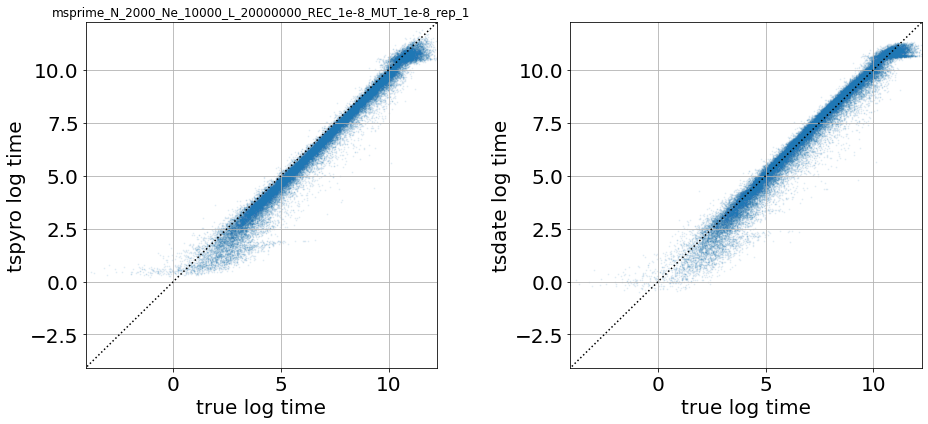

In [128]:
make_msprime_plot(rep=1)

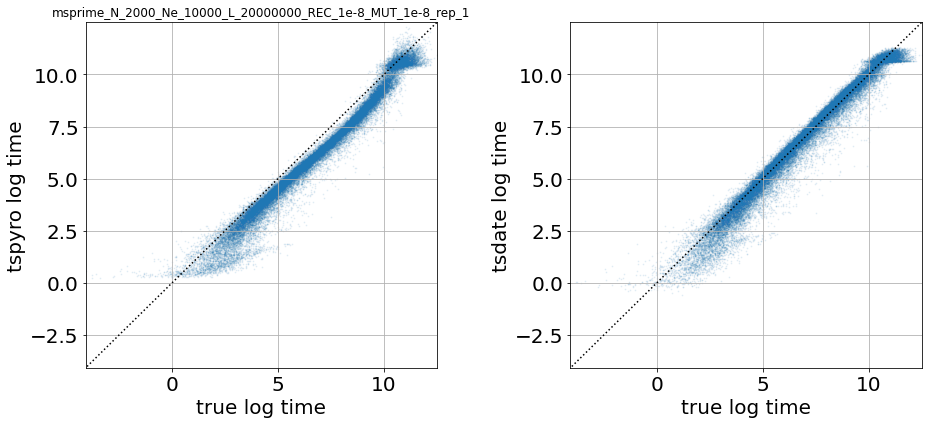

In [103]:
make_plot(rep=4)

In [106]:
def get_slim_data(rep=1):
    result = pickle.load(open('slim/metrics.result.none.tcut100.0.s0.numstep60k.milestones2_1.tinit_prior.lr50.gap_100_10.slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu_1e8_rep_{}.trees.pkl'.format(rep),'rb'))
    pyro = np.log(result['inferred_internal_times'])
    true = np.log(result['true_internal_times'])
    tsdate = np.log(result['tsdate_internal_times'])
    return true, pyro, tsdate

In [111]:
def make_slim_plot(rep=1):
    f, (ax0, ax1) = pyplot.subplots(1, 2, figsize=(13, 6))

    def add_plot(ax, inf, label, true):
        ax.scatter(true, inf, label=label, alpha=0.1, s=0.5)
        ax.plot(np.linspace(-20, 20, 10), np.linspace(-20, 20, 10), ls='dotted', color='k')

        minval = min(true.min(), inf.min())
        maxval = max(true.max(), inf.max())
        ax.set_xlim(minval, maxval)
        ax.set_ylim(minval, maxval)

        ax.set_xlabel("true log time", fontsize=20)
        ax.set_ylabel("{} log time".format(label), fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.grid()
    
    true, pyro, tsdate = get_slim_data(rep=rep)
    print("true min/max", true.min(), true.max())
    
    add_plot(ax0, pyro, "tspyro", true)
    add_plot(ax1, tsdate, "tsdate", true)

    ax0.set_title("slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu_1e8_rep*")
    pyplot.tight_layout()
    pyplot.savefig('slim_2d_Ne_2000_continuous_recapitated_length_1e8_mutated_mu_1e8_rep{}.pdf'.format(rep))

true min/max 0.0 9.808762999820853


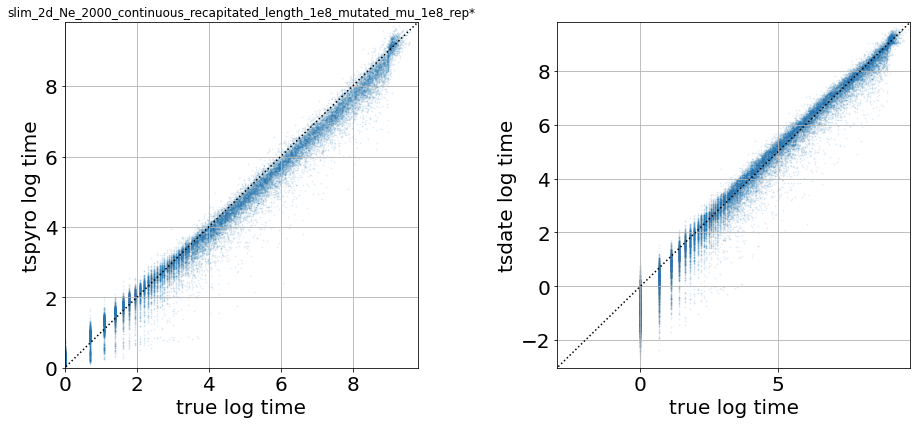

In [112]:
make_slim_plot(rep=1)

true min/max 0.0 9.700899277145794


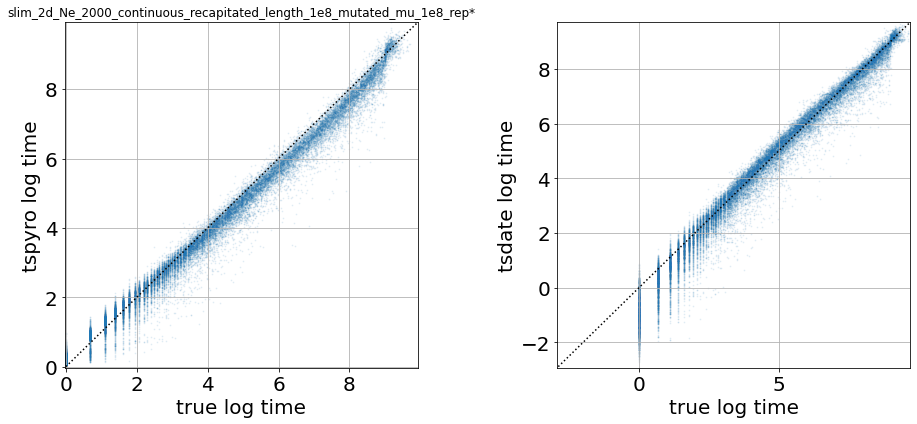

In [113]:
make_slim_plot(rep=2)